## Import libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from scipy import optimize

In [10]:
sns.set()

## Data cleaning

In [11]:
df = pd.read_csv('stages_TDF.csv').dropna()
df = df.dropna() # Winner_Country have many null values
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].map(lambda x: x.year) # add year column

def changeStageNames(x):
    
    plainList = ['Plain stage', 'Flat Stage','Flat cobblestone stage','Plain stage with cobblestones','Intermediate stage', 'Team time trial', 'Half Stage']
    mountainList = ['Stage with mountain(s)','High mountain stage','Medium mountain stage','Stage with mountain','Mountain Stage', 'Hilly Stage', 'Transition stage']
    timeList = ['Mountain time trial', 'Individual time trial']
    
    if x in plainList:
        return 'Flat stage'
    if x in mountainList:
        return 'Mountain stage'
    if x in timeList:
        return 'Time trial'
        return x

df['Gen_type'] = df['Type'].apply(changeStageNames)

france = df.loc[(df['Winner_Country']=='FRA')]

## Analysis of french victories number over time

<AxesSubplot:title={'center':'Number of stage wins per top country origin'}>

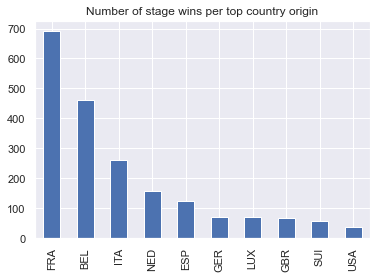

In [12]:
df['Winner_Country'].value_counts().head(10).plot(kind='bar', title = 'Number of stage wins per top country origin')

France is still today the country with the most number of stage wins.

<AxesSubplot:title={'center':'Top french winners'}>

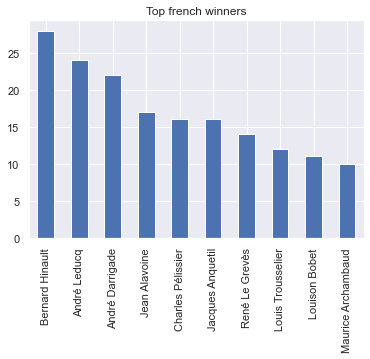

In [13]:
france['Winner'].value_counts().head(10).plot(kind='bar', title = 'Top french winners')

Here is the leaderboard of the most french wins of all time. These ridders are all retired for a long time now.

<AxesSubplot:title={'center':'Number of french wins per year'}, xlabel='Year'>

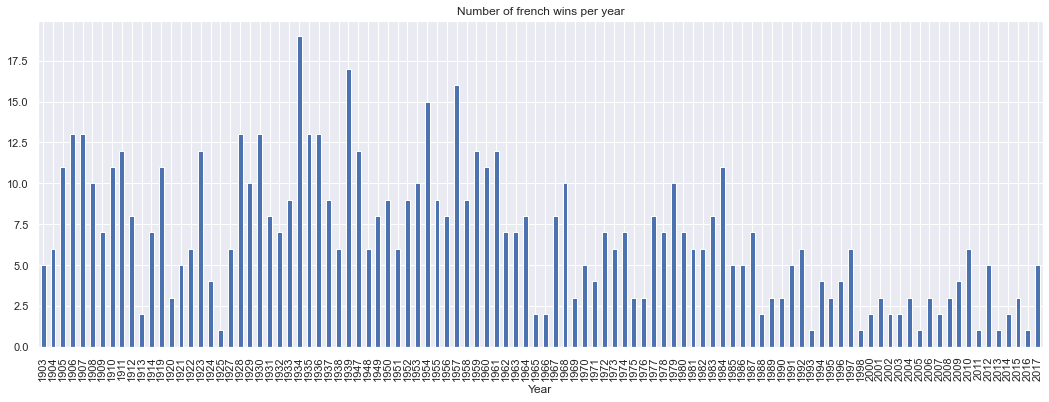

In [14]:
france.groupby('Year').count()['Stage'].plot(kind='bar', figsize=(18, 6), title = 'Number of french wins per year')

The number of french wins is slowly decreasing and hasn't been higher thn 6 since the 1987. As we can see below, the proportion of french wins overtime is quickly decreasing contrarily to Belgium and Italy (the 2nd and the 3rd country with the most stage wins).

<AxesSubplot:title={'center':'Proportion of french wins per year'}, xlabel='Year'>

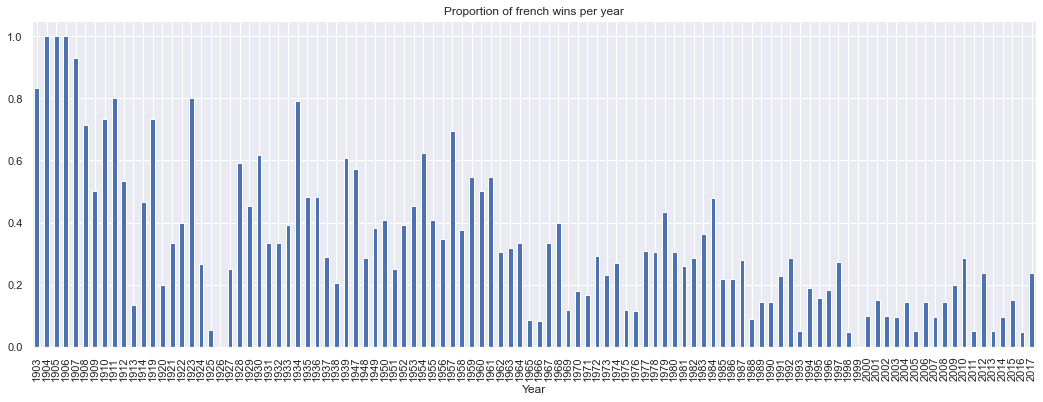

In [16]:
(france.groupby('Year').count()['Stage']/df.groupby('Year').count()['Stage']).plot(kind = 'bar', figsize=(18, 6), title = 'Proportion of french wins per year')

Text(0.5, 1.0, 'Evolution proportion of win for each major country')

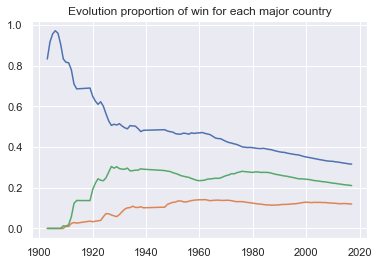

In [22]:
italie = df.loc[(df['Winner_Country']=='ITA')]
belgique = df.loc[(df['Winner_Country']=='BEL')]
year = []
prop = []
for i in range(len(np.sort((df['Year'].unique())))):
    y = np.sort((df['Year'].unique()))[i]
    p_fra = france[france['Year']<=y].count()['Stage']/df[df['Year']<=y].count()['Stage']
    p_ita = italie[italie['Year']<=y].count()['Stage']/df[df['Year']<=y].count()['Stage']
    p_bel = belgique[belgique['Year']<=y].count()['Stage']/df[df['Year']<=y].count()['Stage']
    year.append(y)
    prop.append([p_fra, p_ita, p_bel])

plt.plot(year,prop)
plt.title('Evolution proportion of win for each major country')

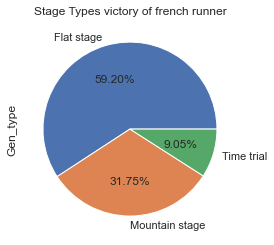

In [27]:
france['Gen_type'].value_counts().plot(kind='pie', autopct='%1.2f%%')
plt.title('Stage Types victory of french runner')
plt.show()

Even if the french win a great amount of flat stages, they have an important proportion of mountain stage wins.